<a href="https://colab.research.google.com/github/lucasferreiraos/curso-aprendizado-de-maquina-na-pratica/blob/master/Consumo_de_%C3%A1lcool_de_estudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consumo de álcool dos estudantes

## Contexto
Os dados foram obtidos em uma pesquisa com estudantes de matemática e língua portuguesa do ensino secundário (ensino médio. Esse dataset contém uma grande quantidade de informações interessantes sobre os estudantes como dados sociais, de gênero e de desempenho escolar.
You can use it for some EDA or try to predict students final grade.

### Conteúdo
Atributos para ambos os datasets `student-mat.csv` e `student-por.csv`:

- `school` - escola dos estudantes (binário: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- `sex` - sexo (binário: 'F' - feminino ou 'M' - masculino)
- `age` - idade (numérico: de 15 a 22)
- `address` - tipo de endereço da casa do estudante (binary: 'U' - urban or 'R' - rural)
- `famsize` - tamanho da família (binário: 'LE3' - menor ou igual a 3 ou 'GT3' - maior que 3)
- `Pstatus` - status de cohabitação dos parentes (binário: 'T' - moram juntos ou 'A' - separados)
- `Medu` - educação da mãe (numérico: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- `Fedu` - educação do pai (numérico: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- `Mjob` - trabalho da mãe (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- `Fjob` - trabalho do pai (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- `reason` - motivo pra escolher essa escola (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- `guardian` - pessoa responsável pelo estudante (nominal: 'mother', 'father' or 'other')
- `traveltime` - tempo de viagem de casa até a escola (numérico: 1 - 1 hour)
- `studytime` - tempo de estudos semanais (numérico: 1 - 10 hours)
- `failures` - número de reprovações anteriores (numérico: n se 1 <= n < 3, se não 4)
- `schoolsup` - suporte educacional extra pela escola (binário: yes or no)
- `famsup` - suporte educacional extra pela família (binário: yes or no)
- `paid` - aulas extras pagas dentro da matéria do curso (Matemática ou Português) (binário: yes or no)
- `activities` - atividades extra-curriculares (binário: yes or no)
- `nursery` - frequentou a escola maternal (binário: yes or no)
- `higher` - quer ir para o ensino superior (binário: yes or no)
- `internet` - acesso a internet em casa (binário: yes or no)
- `romantic` - tem realações amorosas (binário: yes or no)
- `famrel` - qualidade das relações familiares (numérico: de 1 - muito ruim - a 5 - excelente)
- `freetime` - tempo livre depois da escola (numérico: de 1 - muito baixo - a 5 - muito alto)
- `goout` - sai com amigos (numérico: de 1 - muito baixo - a 5 - muito alto)
- `Dalc` - consumo de álcool em dia de trabalho (numérico: de 1 - muito baixo - a 5 - muito alto)
- `Walc` - consumo de álcool no fim de semana (numérico: de 1 - muito baixo - a 5 - muito alto)
- `health` - status atual de saúde (numérico: de 1 - muito ruim - a 5 - muito bom)
- `absences` - número de ausências escolares (numérico: de 0 a 93)

Essas notas estão relacionadas com a matéria do curso, Matemática ou Português:

- `G1` - first period grade (numérico: de 0 a 20)
- `G2` - second period grade (numérico: de 0 a 20)
- `G3` - final grade (numérico: de 0 a 20, output target)

Observação adicional: há vários (382) alunos que pertencem a ambos os conjuntos de dados. Esses estudantes podem ser identificados procurando por atributos de identidade que caracterizam cada estudante, como é mostrado no arquivo R em anexo.

Fonte:
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Fabio Pagnotta, Hossain Mohammad Amran.
Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain@studenti.unicam.it
University Of Camerino

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_math = pd.read_csv('/content/drive/My Drive/Datasets/student-alcohol-consumption/student-mat.csv')

In [3]:
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
len(data_math.columns)

33

### Dei sorte de pegar um dataset sem dados faltantes :)

In [5]:
data_math.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Esse dataset conta com dois arquivos: um arquivo relacionado a disciplina de matemática e outro relacionado a disciplina de língua portuguesa. Vamos focar primeiramente em analisar os dados relacionados a disciplina de matemática.

Temos aqui muitos atributos categóricos e binários que não são numéricos. Vamos dar uma arrumada na casa!

In [8]:
labels = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for label in labels:
    data_math[label] = data_math[label].replace(['yes', 'no'], [1, 0])

In [9]:
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


## Sobre as transformações

`school` são as escolas presentes no dataset:
- 'GP' Gabriel Pereira -> 1
- 'MS' Mousinho da Silveira -> 0

`sex`:
- 'F' female -> 1
- 'M' male -> 0

`address` é sobre o a zona habitacional que o estudante reside:
- 'U' urban -> 1
- 'R' rural -> 0

`famsize` é a quantidade de pessoas que moram com o estudante:
- 'GT3' maior que 3 -> 1
- 'LE3' menor ou igual a 3 -> 0

`Pstatus`status de cohabitação dos pais:
- 'T' juntos -> 1
- 'A' separados -> 0

In [10]:
data_math['school'] = data_math['school'].replace(['GP', 'MS'], [1, 0])
data_math['sex'] = data_math['sex'].replace(['F', 'M'], [1, 0])
data_math['address'] = data_math['address'].replace(['U', 'R'], [1, 0])
data_math['famsize'] = data_math['famsize'].replace(['GT3', 'LE3'], [1, 0])
data_math['Pstatus'] = data_math['Pstatus'].replace(['T', 'A'], [1, 0])

In [11]:
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


Ainda temos alguns dados categóricos e precisamos transformá-los em numéricos mas, dessa vez, temos mais de duas categorias para cada atributo. Então, conferindo quantas categorias cada atributo tem, podemos definir como vamos fazer a "conversão" de categórico para numérico.

`Mjob` e `Fjob` são as áreas/profissões que os pais atuam:
- 'teacher' -> 0
- 'health' -> 1
- civil 'services' -> 2
- 'at_home' -> 3
- 'other' -> 4

`reason` motivos para escolherem determinada instituição
- close to 'home' -> 0
- school 'reputation' -> 1
- 'course' preference -> 2
- 'other' -> 3

`guardian` é a pessoa responsável pelo estudante
- 'mother' -> 0
- 'father' -> 1
- 'other' -> 2

In [12]:
label_encoder = LabelEncoder()

data_math.Mjob = label_encoder.fit_transform(data_math.Mjob)
data_math.Fjob = label_encoder.fit_transform(data_math.Fjob)
data_math.reason = label_encoder.fit_transform(data_math.reason)
data_math.guardian = label_encoder.fit_transform(data_math.guardian)

In [13]:
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


Nossa atributo de classe aqui é `G3` que significa a nota que cada aluno conseguiu e os valores existentes vão de 0 a 20. Veja:

In [ ]:
data_math.G3.unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4])

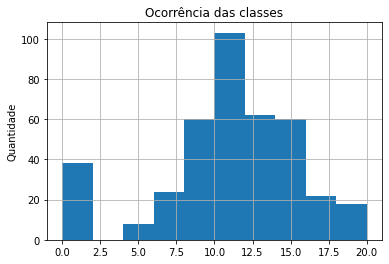

In [16]:
plt.hist(data_math.G3)
plt.title('Ocorrência das classes')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

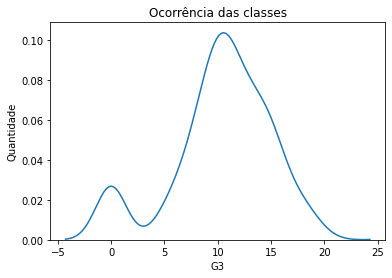

In [20]:
sns.distplot(data_math.G3, hist=False)
plt.title('Ocorrência das classes')
plt.ylabel('Quantidade')
plt.show()

Para facilitar a tarefa de classificação posteriormente, uma possibilidade é criar um numero menor de classes agrupando as classes atuais em grupos a partir de um critério mas deixarei isso a posteriori.

### Analisando correlações

Observar correlações nos dá uma boa visão de como e de onde podemos extrair informações relevantes durante a análise. Você pode levantar algumas hipóteses de quais informações seriam mais importantes para, mais adiante, treinar um modelo preditivo. Vamos lá!

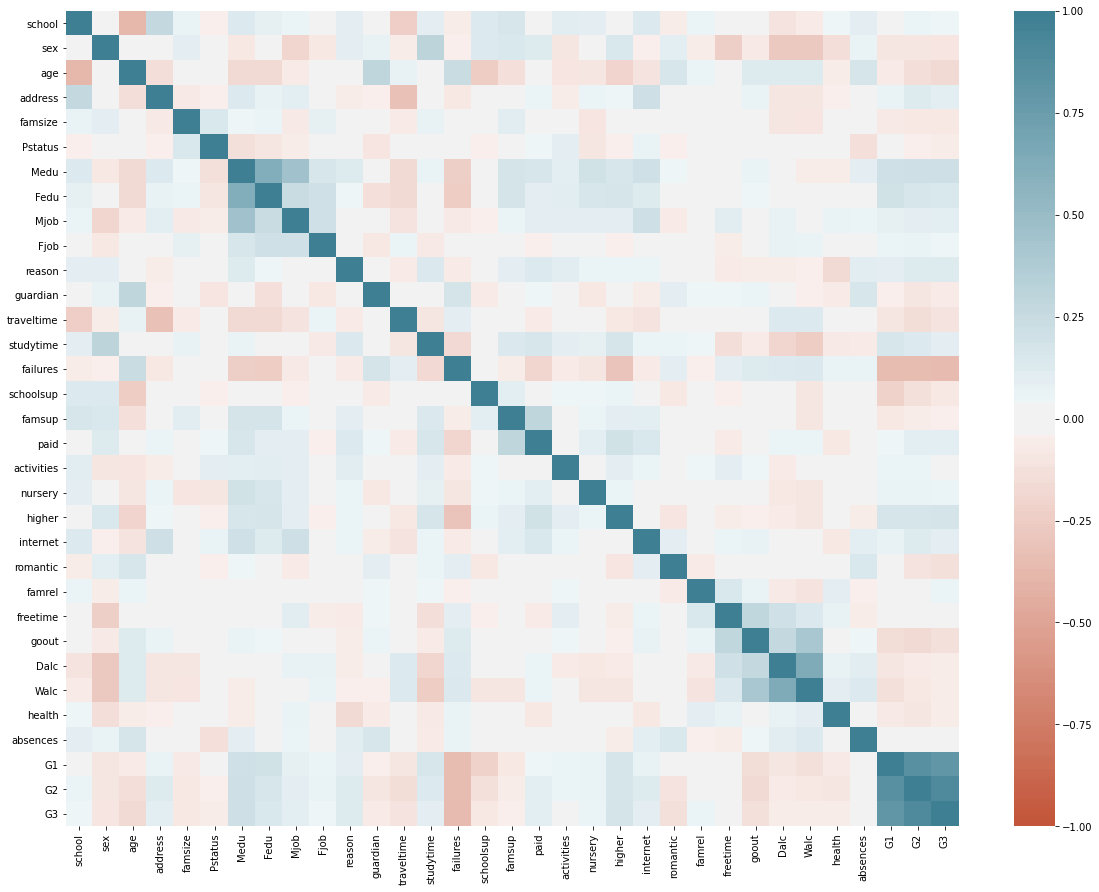

In [26]:
correlation = data_math.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

O que podemos ver é que, no geral, os atributos tem uma baixa correlação entre eles. No entanto, `G1`, `G2` e `G3` tem uma correlação muito forte entre eles. Ou seja, as notas tem uma relação bem forte aqui. Um outro ponto forte de correlação é entre o consumo diário (`Dalc`) e o consumo semanal (`Walc`) de álcool, assim como sair com os amigos (`goout`) tem uma boa correlação com o consumo de álcool. Um outro ponto forte de correlação entre a formação dos pais e seus cargo profissionais. A correlação para os homens entre formação escoar e vida profissional é mais forte (`Medu` e `Mjob`) do que para as mulheres (`Fedu` e `Fjob`).

O sexo (`sex`) da pessoa tem uma boa correlação com o tempo de estudo (`studytime`) investido.

Existem diversas outras correlações e existem muitas correlações negavitas como entre o número de reprovações (`failures`) e as notas (`G1`, `G2` e `G3`) assim como número de reprovações (`failures`) e a pretensão de ingressar no ensino médio (`higher`).

Observar as correlações negativas é tão importante quanto olhar para as positivas, pois elas nos dizem que tal cruzamento de informações não faz muito sentido.

Vamos observar algumas dessas correlações citadas individualmente,=.

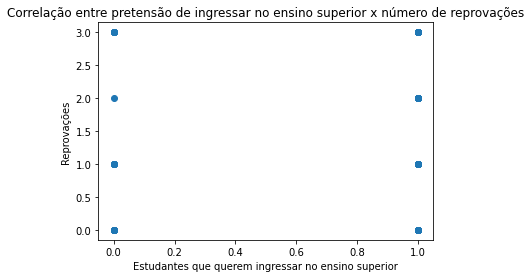

In [28]:
plt.scatter(data_math.higher,data_math.failures)
plt.xlabel('Estudantes que querem ingressar no ensino superior')
plt.ylabel('Reprovações')
plt.title('Correlação entre pretensão de ingressar no ensino superior x número de reprovações')
plt.show()

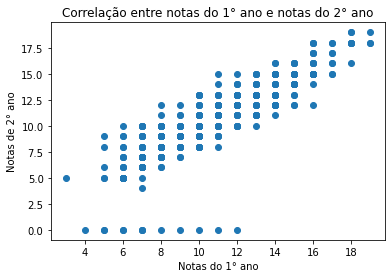

In [34]:
plt.scatter(data_math.G1,data_math.G2)
plt.xlabel('Notas do 1° ano')
plt.ylabel('Notas de 2° ano')
plt.title('Correlação entre notas do 1° ano e notas do 2° ano')
plt.show()